## Observations and Insights 

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [2]:


# Study data files
mouseDatapath = "data/Mouse_metadata.csv"
studyDatapath = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouseDatapath)
studyData = pd.read_csv(studyDatapath)


#Display records of mouse metadata
mouseData.head()
#Display records of study results 
studyData.head()
 
# Combine the data into a single dataset

studyComplete = pd.merge(mouseData, studyData, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

studyComplete.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
studyComplete['Mouse ID'].count()


1893

In [4]:
# Identify duplicate records in the dataset

dupMice_df = studyComplete[studyComplete.duplicated(subset = ["Mouse ID", "Timepoint"])]
dupMice_df                                                                    





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
noDupMice_DF = studyComplete.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
noDupMice_DF.columns = ['MouseId', 'DrugRegimen', 'Sex', 'AgeMonths', 'Weight', 'Timepoint', 'TumorVolume', 'MetaStaticSites']
# Testing variable
noDupMice_DF['MouseId'].count()

1888

In [6]:
noDupMice_DF.head() # Testing variable

,MouseId,DrugRegimen,Sex,AgeMonths,Weight,Timepoint,TumorVolume,MetaStaticSites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:

#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


#Generating stats and values for Summary Table
mouseDrug_gp = noDupMice_DF.groupby("DrugRegimen")
mouseCount = mouseDrug_gp["DrugRegimen"].count()
mouseMean = mouseDrug_gp["TumorVolume"].mean()
mouseMed = mouseDrug_gp["TumorVolume"].median()
mouseStd = mouseDrug_gp["TumorVolume"].std()
mouseVar = mouseDrug_gp["TumorVolume"].var()
mouseSem = mouseDrug_gp["TumorVolume"].sem()

data = { 
    'Count' : mouseCount,
    'Mean' : mouseMean,
    'Median' : mouseMed,
    'Standard_Deviation' : mouseStd,
    'Variance' : mouseVar,
    'SEM' : mouseSem
    } 
miceStats_df = pd.DataFrame(data)

miceStats_df.head()



,Count,Mean,Median,Standard_Deviation,Variance,SEM
DrugRegimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouseDrug_gp.aggregate({"TumorVolume":['count', 'mean', 'median', 'sem' , 'std' , 'var']})


TumorVolume                                                     
                  count       mean     median       sem       std        var
DrugRegimen                                                                 
Capomulin           230  40.675741  41.557809  0.329346  4.994774  24.947764
Ceftamin            178  52.591172  51.776157  0.469821  6.268188  39.290177
Infubinol           178  52.884795  51.820584  0.492236  6.567243  43.128684
Ketapril            188  55.235638  53.698743  0.603860  8.279709  68.553577
Naftisol            186  54.331565  52.509285  0.596466  8.134708  66.173479
Placebo             181  54.033581  52.288934  0.581331  7.821003  61.168083
Propriva            156  52.393463  50.909965  0.525862  6.568014  43.138803
Ramicane            228  40.216745  40.673236  0.320955  4.846308  23.486704
Stelasyn            181  54.233149  52.431737  0.573111  7.710419  59.450562
Zoniferol           182  53.236507  51.818479  0.516398  6.966589  48.533355

## Bar and Pie Charts

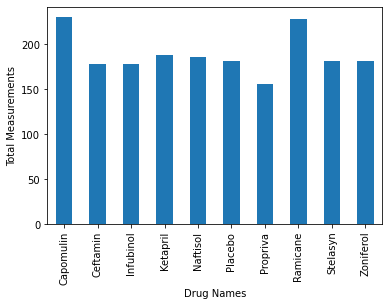

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PANDAS

# m_count --> This variable has total number of mesurements for each of Drug Regimen 

# Isn't this BEAUTIFUL ????? 

# Create a bar chart based off of the group series from before
cChart = mouseCount.plot(kind='bar')

# Set the xlabel and ylabel using class methods
cChart.set_xlabel("Drug Names")
cChart.set_ylabel("Total Measurements")

plt.show()
plt.tight_layout() #Setting tight orientation






Text(23.875, 0.5, 'Total Measurements')

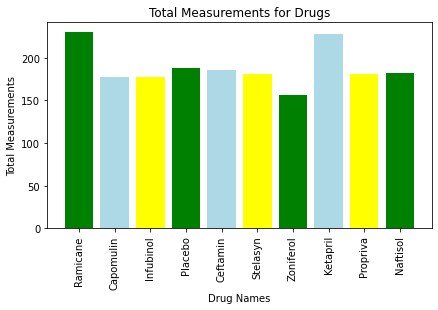

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PYPLOT

xAxis  = noDupMice_DF["DrugRegimen"].unique()
yAxis =  noDupMice_DF["DrugRegimen"].count()
colors = ("green", "lightblue", "yellow") #Setting colors series

plt.bar(xAxis, mouseCount, color=colors)

plt.xticks(rotation=90)
plt.tight_layout() #Setting tight orientation

plt.title("Total Measurements for Drugs")
plt.xlabel("Drug Names")
plt.ylabel("Total Measurements")


(-1.25, 1.25, -1.25, 1.25)

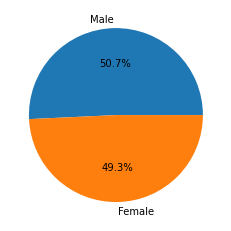

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS

sex = noDupMice_DF["Sex"].unique()
data = noDupMice_DF["Sex"].value_counts()

data.plot(kind='pie', autopct='%1.1f%%')

#Make axis off
plt.axis('off')



(-1.25, 1.25, -1.25, 1.25)

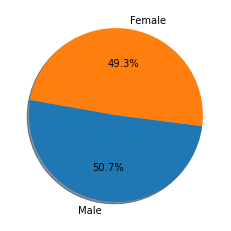

In [12]:
#Generate a pie plot showing the distribution of female versus male mice using PY PLOT

plt.pie(data, labels=sex, autopct='%1.1f%%', shadow=True, startangle=170)

#Make axis off
plt.axis('off')

## Quartiles, Outliers and Boxplots

In [13]:
# Put treatments into a list for for loop (and later for plot labels)

Drugs = ["Ramicane", "Capomulin" , "Infubinol", "Ceftamin"]


In [14]:
miceDrugs = noDupMice_DF[noDupMice_DF.DrugRegimen.isin(Drugs)]
miceDrugs_gp = miceDrugs.groupby(['MouseId', 'DrugRegimen']).max()  # Gets max record for Timepoint for each mouse
#miceDrugs_df = miceDrugs_gp
miceDrugs_df = miceDrugs.groupby(['MouseId']).max()
#miceDrugs_df = miceDrugs_df.clear(['MouseId'])
#miceDrugs_df.reset_index(drop=True, inplace=True)
#miceDrugs_gp.head(30)
miceDrugs_df.head(30)
#print(miceDrugs_df.index[3])
#miceDrugs_df

,DrugRegimen,Sex,AgeMonths,Weight,Timepoint,TumorVolume,MetaStaticSites
MouseId,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0
a520,Ramicane,Male,13,21,45,45.000000,1
a577,Infubinol,Female,6,25,30,57.031862,2
a644,Ramicane,Female,7,17,45,46.910892,1
a685,Infubinol,Male,8,30,45,66.083066,3


In [15]:
miceDrugs_gp_maxtp = miceDrugs_gp.rename(columns = {'Timepoint' : 'MaxTimePoint'})

maxtp_df = pd.DataFrame(noDupMice_DF.groupby('MouseId')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'MaxTimepoint'})
maxtp_df

mergedtp_df = pd.merge(noDupMice_DF, maxtp_df, on='MouseId')
mergedtp_df.head()

,MouseId,DrugRegimen,Sex,AgeMonths,Weight,Timepoint,TumorVolume,MetaStaticSites,MaxTimepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [32]:
# Create empty list to fill with tumor vol data (for plotting)
drugData = []

for drug in drugData:
    
    tempd_df = mergedtp_df.loc[mergedtp_df['DrugRegimen'] == drug]

    finalvolume_df = tempd_df.loc[temp_df['Timepoint'] == tempd_df['MaxTimepoint']]
    
    values = finalvolume_df['TumorVolume']
    Drug_data.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drug +  ": 1st Quartile==>" +  str(lowerq))
    print(drug +  ": 3rd Quartile==>" + str(upperq))
    print(drug +  ": IQR==>" + str(iqr))
    
  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers_count = (values.loc[(final_volume_df['TumorVolume'] >= upper_bound) | (finalvolume_df['TumorVolume'] <= lower_bound)]).count()
    
    print(drug + ": Outlier Count==>" + str(outliers_count))
    print(drug +  ":Lower Bound ==>" +  str(lower_bound))
    print(drug +  ": Upper Bound==>" + str(upper_bound))

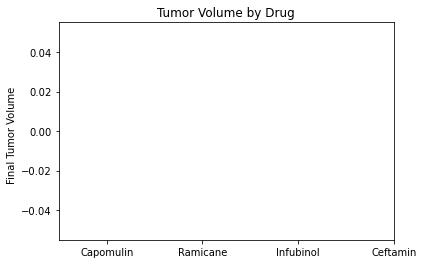

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Marker= dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='blue')

plt.boxplot(drugData, flierprops=Marker)


plt.title('Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume  ')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

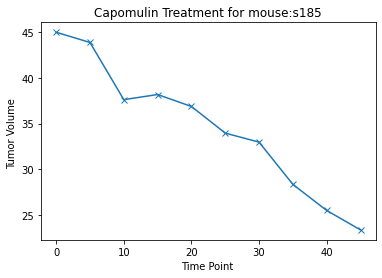

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = []

Capomulin_df = noDupMice_DF.loc[noDupMice_DF['DrugRegimen'] == 'Capomulin']

s185 = Capomulin_df.loc[Capomulin_df['MouseId'] == 's185']

plt.plot(s185['Timepoint'], s185['TumorVolume'], marker = 'x')

# Add labels and title to plot
plt.xlabel("Time Point ")
plt.ylabel("Tumor Volume ")
plt.title("Capomulin Treatment for mouse:" + "s185")

# Display plot
plt.show()

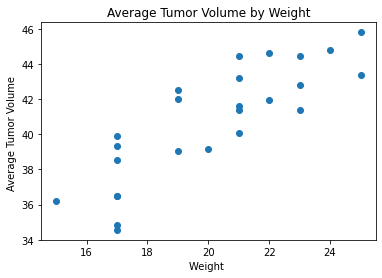

In [26]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgvol_df = pd.DataFrame(Capomulin_df.groupby('MouseId')['TumorVolume'].mean().sort_values()).reset_index().rename(columns={'TumorVolume': 'AvgTumorVol'})

avgvol_df = pd.merge(Capomulin_df, avgvol_df, on='MouseId')
final_avgvol_df = avgvol_df[['Weight', 'AvgTumorVol']].drop_duplicates()
final_avgvol_df

x = final_avgvol_df['Weight']
y = final_avgvol_df['AvgTumorVol']

plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight ")
plt.ylabel("Average Tumor Volume ")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

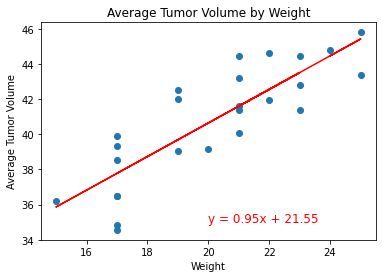

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avgvol_df = pd.DataFrame(Capomulin_df.groupby('MouseId')['TumorVolume'].mean().sort_values()).reset_index().rename(columns={'TumorVolume': 'AvgTumorVol'})
avgvol_df = pd.merge(Capomulin_df, avgvol_df, on='MouseId')
final_avgvol_df = avgvol_df[['Weight', 'AvgTumorVol']].drop_duplicates()
final_avgvol_df
x = final_avgvol_df['Weight']
y = final_avgvol_df['AvgTumorVol']

correlation = st.pearsonr(x,y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=12,color="red")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume by Weight")
plt.show()